In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from colorama import *

C:\Users\panda\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [56]:
df = pd.read_excel(r'C:\Users\panda\OneDrive\Desktop\Bongsen\remodeling.xlsx',sheet_name='Family data')
df.head()

,Code,Family name,Year,Family member,Average VND,Total Human Capital,Total Financial Capital,Total Social capital,Total Physical Capital,Total natural score
0,190002,BUI THI BAO XUYEN,2019,7,847000.0,5.0,3,0.70,5,4.0
1,190002,BUI THI BAO XUYEN,2020,7,1194000.0,5.0,4,1.79,6,4.0
2,190002,BUI THI BAO XUYEN,2021,7,1000000.0,5.0,4,1.88,6,4.0
3,230019,BUI THI CAM,2023,3,800000.0,1.0,2,2.58,3,1.0
4,220002,BUI THI CHINH,2022,3,1472000.0,3.0,2,2.60,4,2.0


In [57]:
df = pd.DataFrame(df)

# Call of Individual Data

Select the Family data : DOAN THI NUOI

In [58]:
family_name = str(input("Enter Family name: "))

def search_family(family_name):
    
    global filter_result

    name_list = df['Family name']
    group_name = {
        'Family name' : df['Family name'],
        'Year' : df['Year'],
        'Family member' : df['Family member'],
        'Total Human Capital' : df['Total Human Capital'],
        'Total Financial Capital' : df['Total Financial Capital'],
        'Total Social capital' : df['Total Social capital'],
        'Total Physical Capital' : df['Total Physical Capital'],
        'Total natural score' : df['Total natural score'],
        'Average VND' : df['Average VND']
    }
    data_frame = pd.DataFrame(group_name, columns = ['Family name','Year','Family member',
                                                    'Total Human Capital','Total Financial Capital','Total Social capital',
                                                    'Total Physical Capital','Total natural score','Average VND'])
    
    filter_result = data_frame[data_frame['Family name']== family_name]
    range = len(filter_result)
    return(filter_result.head(range))

search_family(family_name)

Enter Family name: DOAN THI NUOI


,Family name,Year,Family member,Total Human Capital,Total Financial Capital,Total Social capital,Total Physical Capital,Total natural score,Average VND
77,DOAN THI NUOI,2018,4,2.0,0,1.8,1,3.0,372000.0
78,DOAN THI NUOI,2019,5,3.0,2,1.8,3,3.0,602000.0
79,DOAN THI NUOI,2020,7,4.0,2,1.8,5,3.0,703000.0
80,DOAN THI NUOI,2021,7,4.0,2,1.9,5,3.0,722000.0
81,DOAN THI NUOI,2022,6,4.0,2,2.2,5,3.0,869000.0


# Working with the same rows

alternative 1 :select the row to delete

In [ ]:
filter_result[filter_result['Year']==2020].head() #select year that have 2 rows

In [ ]:
filter_result.drop(133,axis=0,inplace=True)

In [ ]:
filter_result.head()

alternative 2:delete the ducplicate row

In [ ]:
filter_result.drop_duplicates(subset=['Family name', 'Year'], inplace=True)

In [ ]:
filter_result.head()

# Summation the capital score by year : Manually

You MUST run all the year Do not put more

In [14]:
filter_result['Year'].head()

77    2018
78    2019
79    2020
80    2021
81    2022
Name: Year, dtype: int64

In [24]:
def extract_year(yearly, filter_result):
    filter_year = filter_result[filter_result['Year'] == yearly]
    
    summary_score_focus_year = filter_year[['Total Human Capital', 'Total Financial Capital', 'Total Social capital', 'Total Physical Capital', 'Total natural score']].sum()
    print("The total score in", yearly, "is", summary_score_focus_year.sum())
    print("Total Human Capital", summary_score_focus_year['Total Human Capital'])
    print("Total Financial Capital", summary_score_focus_year['Total Financial Capital'])
    print("Total Social capital", summary_score_focus_year['Total Social capital'])
    print("Total Physical Capital", summary_score_focus_year['Total Physical Capital'])
    print("Total natural score", summary_score_focus_year['Total natural score'])
    
    years = np.array(filter_result['Year'])
    index = np.where(years == yearly)[0][0]
    score_columns = ['score_{}'.format(year) for year in years]
    human_columns = ['human_{}'.format(year) for year in years]
    finan_columns = ['finan_{}'.format(year) for year in years]
    social_columns = ['social_{}'.format(year) for year in years]
    physic_columns = ['physic_{}'.format(year) for year in years]
    natur_columns = ['natur_{}'.format(year) for year in years]
    
    globals().update({score_columns[index]: summary_score_focus_year.sum(),
                      human_columns[index]: summary_score_focus_year['Total Human Capital'],
                      finan_columns[index]: summary_score_focus_year['Total Financial Capital'],
                      social_columns[index]: summary_score_focus_year['Total Social capital'],
                      physic_columns[index]: summary_score_focus_year['Total Physical Capital'],
                      natur_columns[index]: summary_score_focus_year['Total natural score']})
    
    return filter_year.head()

yearly = int(input("Enter focus year: "))
extract_year(yearly, filter_result)


Enter focus year: 2018
The total score in 2018 is 7.8
Total Human Capital 2.0
Total Financial Capital 0.0
Total Social capital 1.8
Total Physical Capital 1.0
Total natural score 3.0


,Family name,Year,Family member,Total Human Capital,Total Financial Capital,Total Social capital,Total Physical Capital,Total natural score,Average\nVND
77,DOAN THI NUOI,2018,4,2.0,0,1.8,1,3.0,372000.0


In [25]:
print(family_name)
print("The Total score in 2018 is",score_2018)
print("The Total score in 2019 is",score_2019)
print("The Total score in 2020 is",score_2020)
print("The Total score in 2021 is",score_2021)
print("The Total score in 2022 is",score_2022)
# print("The Total score in 2023 is",score_2023)

DOAN THI NUOI
The Total score in 2018 is 7.8
The Total score in 2019 is 12.8
The Total score in 2020 is 15.8
The Total score in 2021 is 15.9
The Total score in 2022 is 16.2


# Evaluate the color code of Total score

In [26]:
data = [score_2018,score_2019,score_2020,score_2021,score_2022] #,score_2023,score_2024
count_red = 0
count_yellow = 0
count_green = 0
for i in data:
    if 0 <= i <= 9.99:
        print(Back.RED + "red",i)
        count_red = count_red + 1
    elif 10 <= i <= 19.99:
        print(Back.YELLOW + "yellow",i)
        count_yellow = count_yellow + 1
    elif 20 <= i <= 28:
        print(Back.GREEN + "Green",i)
        count_green = count_green +1
    else:
        print(Back.BLACK + "Error",i)


red 7.8
yellow 12.8
yellow 15.8
yellow 15.9
yellow 16.2


# Pie chart the ratio of color

In [27]:
filter_result['Family member'].head()
family_memb = np.array(filter_result['Family member'])
print(family_memb)

[4 5 7 7 6]


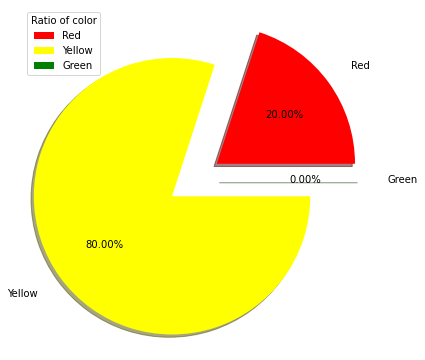

In [28]:
y = np.array([count_red,count_yellow,count_green])
graph_lebels = ["Red","Yellow","Green"]
colors = ['red','yellow','green']
myexplode = [0.2, 0.2 , 0.2]
plt.pie(y, labels = graph_lebels, colors = colors, explode = myexplode, shadow =True,autopct='%1.2f%%',labeldistance=1.2)
plt.legend(title = "Ratio of color")
plt.gca().set_aspect('equal')
plt.gca().set_position([0.1, 0.1, 1.2, 1.2])
plt.show()

# Line chart of total score vs year

In [29]:
#declare variable
df_year = [2018,2019,2020,2021,2022] #2023,2024
df_score = [score_2018,score_2019,score_2020,score_2021,score_2022]
family_memb
avg_nvd = np.array(filter_result['Average\nVND'])

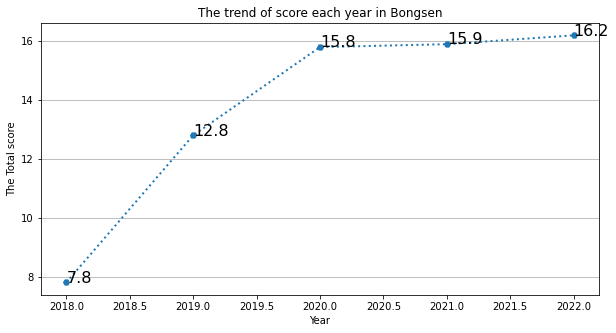

In [30]:
x = df_year
y = df_score
plt.figure(figsize = (10, 5))
plt.plot(x,y,marker="H",ls = ':',lw=2)
plt.title("The trend of score each year in Bongsen")
plt.xlabel("Year")
plt.ylabel("The Total score")
plt.grid(axis = 'y')
for a,b in zip(x, y): 
    plt.text(a, b, str(b),fontsize=16)
plt.show()

# Line chart of family member vs year

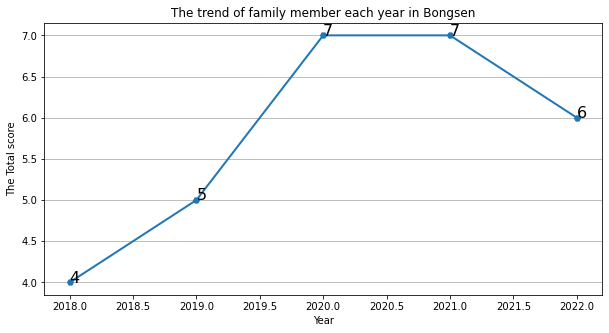

In [31]:
x = df_year
y = family_memb
plt.figure(figsize = (10, 5))
plt.plot(x,y,marker="H",ls = '-',lw=2)
plt.title("The trend of family member each year in Bongsen")
plt.xlabel("Year")
plt.ylabel("The Total score")
plt.grid(axis = 'y')
for a,b in zip(x, y): 
    plt.text(a, b, str(b),fontsize=16)
plt.show()

# Line chart of earning vs year

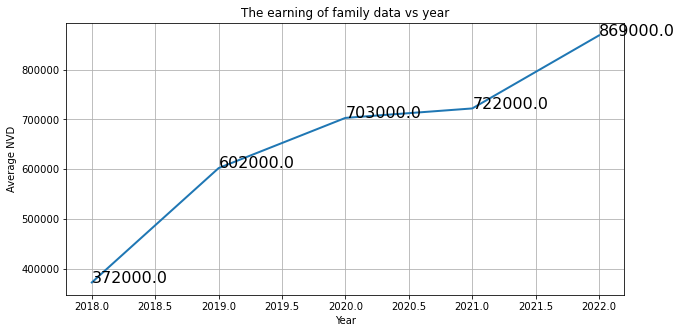

In [32]:
x = df_year
y = avg_nvd
plt.figure(figsize = (10, 5))
plt.plot(x,y,lw=2)
plt.title('The earning of family data vs year')
plt.xlabel('Year')
plt.ylabel('Average NVD')
plt.grid()
for a,b in zip(x, y): 
    plt.text(a, b, str(b),fontsize=16)
plt.show()

# Criteria score each year

In [33]:
#compare each capital vs year
df_human = [human_2018, human_2019, human_2020, human_2021, human_2022]
df_finan = [finan_2018, finan_2019, finan_2020, finan_2021, finan_2022]
df_social = [social_2018, social_2019, social_2020, social_2021, social_2022]
df_physic = [ physic_2018, physic_2019, physic_2020, physic_2021, physic_2022]
df_natur = [natur_2018, natur_2019, natur_2020, natur_2021, natur_2022]
df_year = [2018,2019,2020,2021,2022]

In [34]:
fig = plt.figure(dpi=80)

<Figure size 480x320 with 0 Axes>

In [35]:
axes = fig.add_axes([0,0,1,1]) #origin pont(0,0) high (1,1)

In [36]:
axes.plot(df_year,df_human, label='Human Capital', marker='D',color='#ca94e0',lw=3)
axes.plot(df_year,df_finan, label='Financial Capital', marker='*',color='#e92297',lw=3)
axes.plot(df_year,df_social, label='Social capital', marker='p',color='#689953',lw=3)
axes.plot(df_year,df_physic, label='Physical Capital', marker='s',color='#e8d3be',lw=3)
axes.plot(df_year,df_natur, label='Natural Score', marker='.',color='#85f1f1',lw=3)

In [37]:
axes.legend()

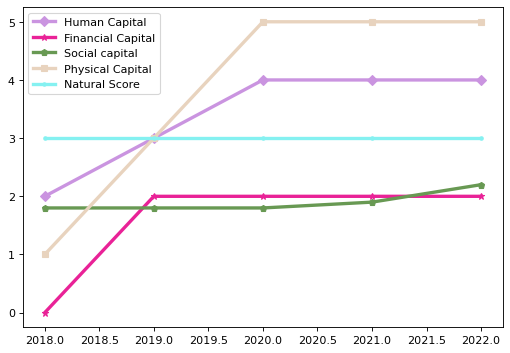

In [38]:
fig

Text(0.5, 1.0, 'The score of 2018')

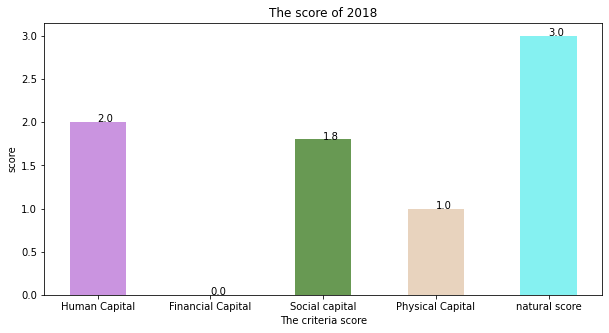

In [39]:
x = ['Human Capital','Financial Capital','Social capital','Physical Capital','natural score']
y = [human_2018,finan_2018,social_2018,physic_2018,natur_2018]
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
colors = ['#ca94e0','#e92297','#689953','#e8d3be','#85f1f1']
plt.figure(figsize = (10, 5))
plt.bar(x,y,width = 0.5,color=colors)
addlabels(x, y)
plt.xlabel('The criteria score')
plt.ylabel('score')
plt.title('The score of 2018')

Text(0.5, 1.0, 'The score of 2019')

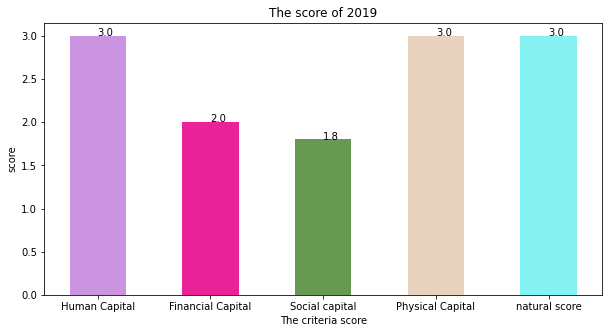

In [40]:
x = ['Human Capital','Financial Capital','Social capital','Physical Capital','natural score']
y = [human_2019,finan_2019,social_2019,physic_2019,natur_2019]
colors = ['#ca94e0','#e92297','#689953','#e8d3be','#85f1f1']
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
plt.figure(figsize = (10, 5))
plt.bar(x,y,width = 0.5,color=colors)
addlabels(x, y)
plt.xlabel('The criteria score')
plt.ylabel('score')
plt.title('The score of 2019')

Text(0.5, 1.0, 'The score of 2020')

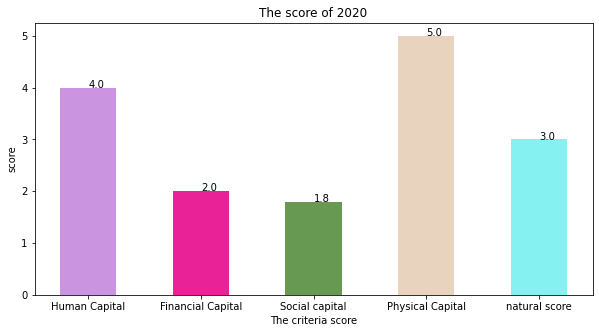

In [41]:
x = ['Human Capital','Financial Capital','Social capital','Physical Capital','natural score']
y = [human_2020,finan_2020,social_2020,physic_2020,natur_2020]
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
colors = ['#ca94e0','#e92297','#689953','#e8d3be','#85f1f1']
plt.figure(figsize = (10, 5))
plt.bar(x,y,width = 0.5,color=colors)
addlabels(x, y)
plt.xlabel('The criteria score')
plt.ylabel('score')
plt.title('The score of 2020')

Text(0.5, 1.0, 'The score of 2021')

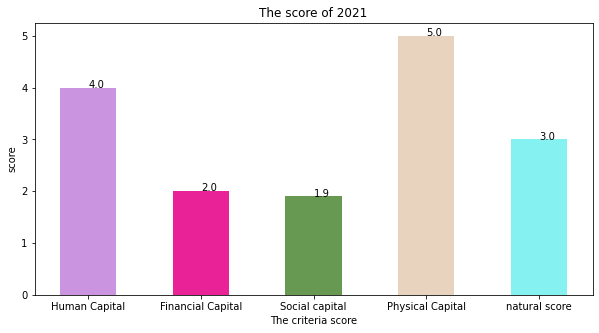

In [42]:
x = ['Human Capital','Financial Capital','Social capital','Physical Capital','natural score']
y = [human_2021,finan_2021,social_2021,physic_2021,natur_2021]
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
colors = ['#ca94e0','#e92297','#689953','#e8d3be','#85f1f1']
plt.figure(figsize = (10, 5))
plt.bar(x,y,width = 0.5,color=colors)
addlabels(x, y)
plt.xlabel('The criteria score')
plt.ylabel('score')
plt.title('The score of 2021')

Text(0.5, 1.0, 'The score of 2022')

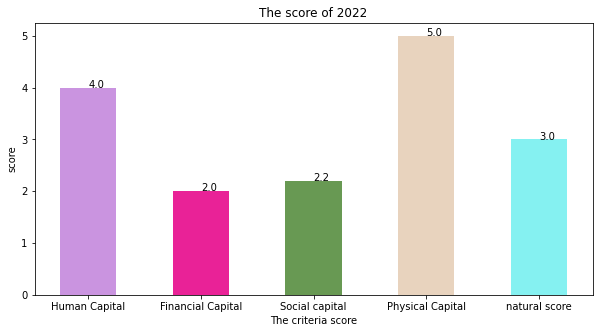

In [43]:
x = ['Human Capital','Financial Capital','Social capital','Physical Capital','natural score']
y = [human_2022,finan_2022,social_2022,physic_2022,natur_2022]
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
colors = ['#ca94e0','#e92297','#689953','#e8d3be','#85f1f1']
plt.figure(figsize = (10, 5))
plt.bar(x,y,width = 0.5,color=colors)
addlabels(x, y)
plt.xlabel('The criteria score')
plt.ylabel('score')
plt.title('The score of 2022')